# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [2]:
# Algumas configurações para o matplotlib.
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
 
for col in new_column_names:
    try:
        countries[col] = countries[col].str.strip()  # trim leading spaces
        countries[col] = countries[col].str.replace(',','.').astype(float)
    except:
        pass


In [6]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country             227 non-null object
Region              227 non-null object
Population          227 non-null int64
Area                227 non-null int64
Pop_density         227 non-null float64
Coastline_ratio     227 non-null float64
Net_migration       224 non-null float64
Infant_mortality    224 non-null float64
GDP                 226 non-null float64
Literacy            209 non-null float64
Phones_per_1000     223 non-null float64
Arable              225 non-null float64
Crops               225 non-null float64
Other               225 non-null float64
Climate             205 non-null float64
Birthrate           224 non-null float64
Deathrate           223 non-null float64
Agriculture         212 non-null float64
Industry            211 non-null float64
Service             212 non-null float64
dtypes: float64(16), int64(2), object(2)
memory usage: 35.5+ KB


In [7]:
countries.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [8]:
np.sort(countries["Region"].unique())

array(['ASIA (EX. NEAR EAST)', 'BALTICS', 'C.W. OF IND. STATES',
       'EASTERN EUROPE', 'LATIN AMER. & CARIB', 'NEAR EAST',
       'NORTHERN AFRICA', 'NORTHERN AMERICA', 'OCEANIA',
       'SUB-SAHARAN AFRICA', 'WESTERN EUROPE'], dtype=object)

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [9]:
def q1():
    return np.sort(countries["Region"].unique()).tolist()

In [10]:
# 
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

In [11]:
countries['Pop_density'].describe()

count      227.000000
mean       379.047137
std       1660.185825
min          0.000000
25%         29.150000
50%         78.800000
75%        190.150000
max      16271.500000
Name: Pop_density, dtype: float64

23

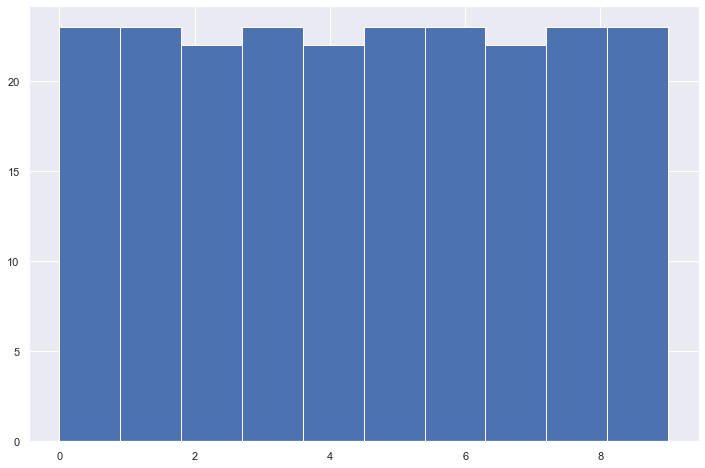

In [12]:

est = preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
pop_density_10bins = est.fit_transform(countries[['Pop_density']])
plt.hist(pop_density_10bins)
(pop_density_10bins > np.percentile(pop_density_10bins, 90)).sum()

In [13]:
enc = preprocessing.OneHotEncoder()
    
climate_one_hot = enc.fit_transform(countries[['Climate']].dropna())
region_one_hot = enc.fit_transform(countries[['Region']])
        
climate_old_n = countries['Climate'].nunique()
region_old_n = countries['Region'].nunique()
    
new_elements_climate = climate_one_hot.shape[1] - 1
new_elements_region = region_one_hot.shape[1] - 1
    
new_elements = new_elements_climate + new_elements_region
new_elements_climate
new_elements_region

10

In [14]:
climate_one_hot.shape[0] * climate_one_hot.shape[1] - len(countries['Climate'])

1003

In [15]:
new_elements = climate_one_hot.shape[0] * climate_one_hot.shape[1] - len(countries['Climate'])
new_elements = new_elements + region_one_hot.shape[0] * region_one_hot.shape[1] - len(countries['Region'])
new_elements

3273

In [16]:
climate_one_hot

<205x6 sparse matrix of type '<class 'numpy.float64'>'
	with 205 stored elements in Compressed Sparse Row format>

In [17]:
countries['Climate'].nunique()

6

In [18]:
countries['Region'].nunique()

11

In [19]:
region_one_hot 

<227x11 sparse matrix of type '<class 'numpy.float64'>'
	with 227 stored elements in Compressed Sparse Row format>

In [20]:
countries['Climate'].value_counts()

2.0    111
3.0     48
1.0     29
1.5      8
4.0      6
2.5      3
Name: Climate, dtype: int64

In [21]:
countries['Region'].value_counts()

SUB-SAHARAN AFRICA      51
LATIN AMER. & CARIB     45
ASIA (EX. NEAR EAST)    28
WESTERN EUROPE          28
OCEANIA                 21
NEAR EAST               16
EASTERN EUROPE          12
C.W. OF IND. STATES     12
NORTHERN AFRICA          6
NORTHERN AMERICA         5
BALTICS                  3
Name: Region, dtype: int64

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [22]:
def q2():
    est = preprocessing.KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    pop_density_10bins = est.fit_transform(countries[['Pop_density']])
    plt.hist(pop_density_10bins)
    above_90 = np.sum(pop_density_10bins >= 9)
    # (pop_density_10bins > np.percentile(pop_density_10bins, 90)).sum()
    return above_90

23

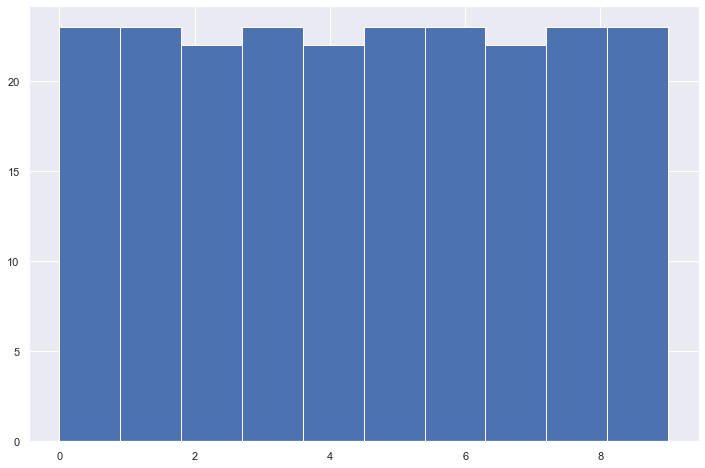

In [23]:
q2()

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [24]:
def q3():
    enc = preprocessing.OneHotEncoder()
    
    climate_one_hot = enc.fit_transform(countries[['Climate']].dropna())
    region_one_hot = enc.fit_transform(countries[['Region']])
        
    climate_old_n = countries['Climate'].nunique()
    region_old_n = countries['Region'].nunique()
    
    new_elements_climate = climate_one_hot.shape[1] - 1
    new_elements_region = region_one_hot.shape[1] - 1
    
    new_elements = new_elements_climate + new_elements_region
    
    return new_elements

In [25]:
q3()  #18

15

In [26]:
climate_one_hot.shape[1]

6

In [27]:
climate_one_hot.shape[1]

6

In [28]:
col_int_float_names = countries.select_dtypes(include=['int64', 'float64']).columns

imputed_countries = countries.copy()

for col in col_int_float_names:
    imputed_countries[col] = countries[col].fillna(countries[col].median())


In [29]:
countries.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [30]:
imputed_countries.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.099,0.272,0.571
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.099,0.272,0.571


In [31]:
# Create the Scaler object
scaler = preprocessing.StandardScaler()

scaled_countries = imputed_countries.copy()

for col in col_int_float_names:
    scaled_countries[[col]] = scaler.fit_transform(scaled_countries[[col]])
    

In [32]:
scaled_countries.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),0.019695,0.027583,-0.199844,-0.293443,4.750798,3.638098,-0.896394,-2.497817,-1.027491,-0.126361,-0.518861,0.372602,-1.694358,2.212967,2.252507,1.636576,-0.315406,-1.161135
1,Albania,EASTERN EUROPE,-0.213877,-0.318797,-0.153603,-0.275974,-1.025097,-0.392850,-0.516718,0.151933,-0.726079,0.565115,-0.013604,-0.447933,1.316360,-0.627986,-0.809333,0.595163,-0.706318,0.083424
2,Algeria,NORTHERN AFRICA,0.035618,0.998421,-0.220490,-0.292889,-0.088242,-0.122886,-0.366846,-0.713827,-0.695494,-0.813978,-0.515252,0.926276,-1.694358,-0.444844,-0.932859,-0.326627,2.390911,-1.673969
3,American Samoa,OCEANIA,-0.243834,-0.334779,-0.053514,0.514709,-4.281389,-0.741696,-0.167016,0.702871,0.108568,-0.290741,1.259163,-0.416135,-0.188999,0.035113,-1.204213,-0.340700,-0.074844,0.033392
4,Andorra,WESTERN EUROPE,-0.243720,-0.334629,-0.137002,-0.293443,1.354184,-0.890347,0.932047,0.860282,1.162182,-0.891152,-0.545327,1.004214,1.316360,-1.205379,-0.600755,-0.340700,-0.074844,0.033392


## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [33]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [150]:
def Standardize(x,X):
    mu = X.mean() 
    sd = X.std()
    z = (x - mu)/sd
    return z

In [135]:
len(test_country)

20

In [147]:
len(idx_list)

18

In [151]:
idx = np.zeros(len(test_country))
for col in col_int_float_names:
    idx[scaled_countries.columns.get_loc(col)] = scaled_countries.columns.get_loc(col)

idx_list = [int(ii) for ii in idx if ii>0]

scaled_test_country = np.array(test_country)

for col in idx_list:
    test_country[col] = Standardize(test_country[col], scaled_countries[col_int_float_names[col-2]])
    

    
id_arable = scaled_countries.columns.get_loc('Arable')
    
test_country[id_arable].round(3)


0.198

In [149]:
idx_list = [int(ii) for ii in idx if ii>0]
idx_list

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [98]:
len(test_country)

20

In [34]:
def q4():  #-1.047
    # Retorne aqui o resultado da questão 4.
    pass

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

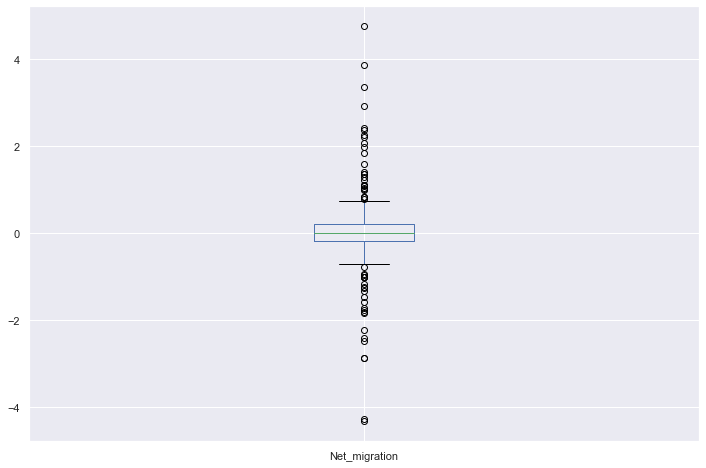

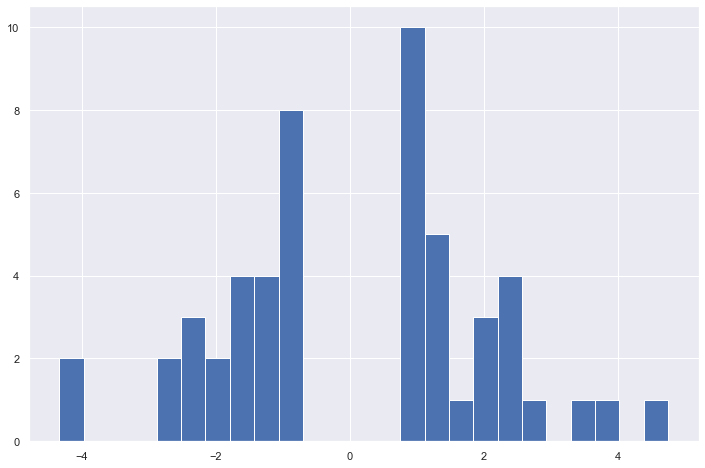

In [35]:
statistics = scaled_countries['Net_migration'].describe()
Q_1 = statistics['25%']
Q_3 = statistics['75%']
IQR = Q_3 - Q_1

outliers = scaled_countries['Net_migration'].loc[(scaled_countries['Net_migration'] < Q_1 - 1.5 * IQR) 
                                          | (scaled_countries['Net_migration'] > Q_3 + 1.5 * IQR)]

outliers_below = scaled_countries['Net_migration'].loc[(scaled_countries['Net_migration'] < Q_1 - 1.5 * IQR)]

outliers_above = scaled_countries['Net_migration'].loc[(scaled_countries['Net_migration'] > Q_3 + 1.5 * IQR)]

scaled_countries[['Net_migration']].boxplot()
fig = plt.figure()
outliers.hist(bins=25)

quartile_boxplot e np.quantile apresentam diferenças ...

In [36]:
def quartile_boxplot(x):
    
    X = np.sort(x)
    
    n = len(X)
    median = np.median(X)
    
    if n % 2 != 0:  # odd
        # Median excluded
        X_below = X[:n//2]
        X_above = X[n//2+1:]
        
    else:  # even
        # Median included
        X_below = X[:n//2]
        X_above = X[n//2:]
        
    Q_1 = np.median(X_below)
    
    
    # TODO: investigate differences
    # assert(np.allclose(np.quantile(X, 0.25), Q_1))
    
    Q_3 = np.median(X_above)
    
    # assert(np.allclose(np.quantile(X, 0.75), Q_3))
    
    return Q_1, Q_3

In [37]:
x = scaled_countries['Net_migration'].to_numpy()
Q_1, Q_3 = quartile_boxplot(x)
Q_1

-0.19554698037303636

In [38]:
np.quantile(x, 0.25)


-0.19451520210738904

In [39]:
Q_3

0.19652876057294746

In [40]:
np.quantile(x, 0.75)

0.1944652040416528

In [41]:
scaled_countries['Net_migration'].describe()

count    2.270000e+02
mean    -3.912680e-18
std      1.002210e+00
min     -4.339168e+00
25%     -1.945152e-01
50%     -7.763336e-03
75%      1.944652e-01
max      4.750798e+00
Name: Net_migration, dtype: float64

In [42]:
def q5():
    # statistics = scaled_countries['Net_migration'].describe()
    #Q_1 = statistics['25%']
    # Q_3 = statistics['75%']
    
    # Q_1 = np.quantile(scaled_countries['Net_migration'].to_numpy(), 0.25)
    # Q_3 = np.quantile(scaled_countries['Net_migration'].to_numpy(), 0.75)
    
    Q_1, Q_3 = quartile_boxplot(scaled_countries['Net_migration'].to_numpy())
    
    IQR = Q_3 - Q_1
    
    outliers_below = scaled_countries['Net_migration'].loc[(scaled_countries['Net_migration'] < Q_1 - 1.5 * IQR)]

    outliers_above = scaled_countries['Net_migration'].loc[(scaled_countries['Net_migration'] > Q_3 + 1.5 * IQR)]

    remove = False

    return (len(outliers_below), len(outliers_above), remove)

In [43]:
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [44]:
from sklearn.datasets import fetch_20newsgroups

categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [45]:
def q6():
    from sklearn.feature_extraction.text import CountVectorizer
    
    cv = CountVectorizer(vocabulary=['phone'])
    phone_count = cv.fit_transform(newsgroup['data']).toarray().sum()
    
    return phone_count

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [ ]:
#    from sklearn.feature_extraction.text import TfidfVectorizer 
    
#    vectorizer = TfidfVectorizer(vocabulary=['phone'])
#    X = vectorizer.fit_transform(newsgroup['data'])
#    print(vectorizer.get_feature_names())

array([3.51117886])

In [80]:
def q7():
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.feature_extraction.text import TfidfVectorizer
    
    pipe = Pipeline([('count', TfidfVectorizer(vocabulary=['phone'])),
                  ('tfid', TfidfTransformer())]).fit(newsgroup['data'])
    pipe['count'].transform(newsgroup['data']).toarray()
    X = pipe['tfid'].idf_
       
    
    return round(X[0], 3)

In [81]:
q7()

3.511